In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.rename(columns = {'Unnamed: 0':'id'},inplace = True)

In [5]:
df.isnull().sum()

id                 0
YearsExperience    0
Salary             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


### Visualize the Data

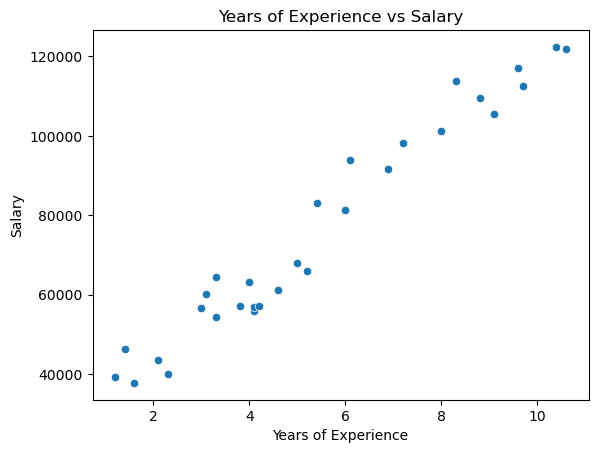

In [8]:
sns.scatterplot(x = 'YearsExperience', y='Salary', data = df)
plt.title("Years of Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

### Split the Data

In [10]:
# Split data into train and test
from sklearn.model_selection import train_test_split

x = df[['YearsExperience']]
y = df[['Salary']]

#split data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

### Train the Linear Regression Model

In [12]:
from sklearn.linear_model import LinearRegression

#create the model and train it
model = LinearRegression()
model.fit(x_train, y_train)

print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Intercept: [24380.20147947]
Coefficient: [[9423.81532303]]


 ### Make Predictions

In [44]:
#predict the salaries for test set

y_pred = model.predict(x_test)   #predicting the y_test based on x_test and calling it y_pred
y_pred = y_pred.flatten()       #converting to 1d   
# y_test = y_test.to_numpy().flatten()  #converting to 1d
# Create comparison DataFrame
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison.head()


,Actual,Predicted
0,112636.0,115791.210113
1,67939.0,71499.278095
2,113813.0,102597.868661
3,83089.0,75268.804224
4,64446.0,55478.792045


### Evaluate the Model

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 6286.453830757745
Mean Squared Error: 49830096.855908334
R-squared: 0.9024461774180498


### Visualize the Regression Line

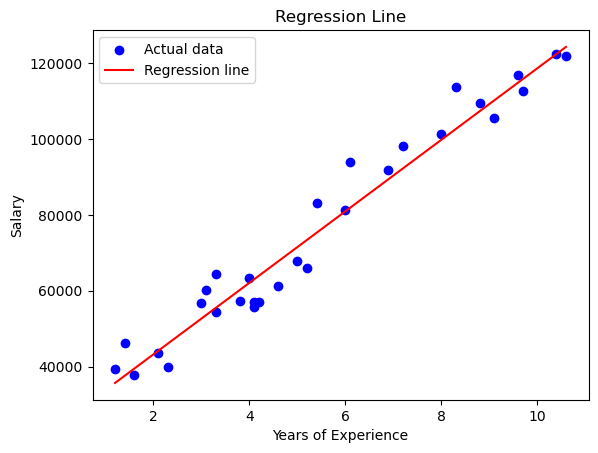

In [32]:
plt.scatter(x, y, color='blue', label='Actual data')
plt.plot(x, model.predict(x), color='red', label='Regression line')  
#x represents the independent variable (features or inputs), which could be your training data or a range of values.
# model.predict(x) uses the trained model to predict the dependent variable (outputs or targets) for each value of x. The model's predictions are then plotted.
plt.title("Regression Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()